# CLASSIFICATOR USING THE RANDOMIZED ANN FEATURES

In [1]:
import os
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Extracting the labels

This is for general use in every classification.

In [2]:
(_, y_train), (_, y_test) = mnist.load_data()

In [3]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [4]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

## Classification 

ANN Nº:  0 

313/313 [==============================] - 1s 2ms/step - loss: 1.2174 - accuracy: 0.5785


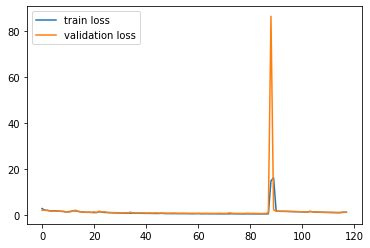

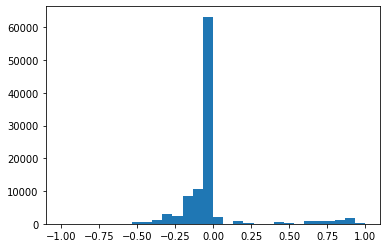



ANN Nº:  1 

313/313 [==============================] - 1s 2ms/step - loss: 1.1140 - accuracy: 0.6530


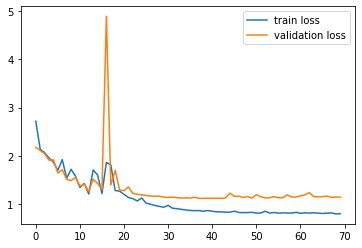

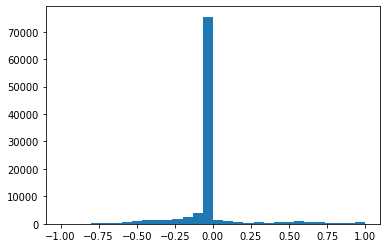



ANN Nº:  2 

313/313 [==============================] - 1s 2ms/step - loss: 0.6131 - accuracy: 0.9604


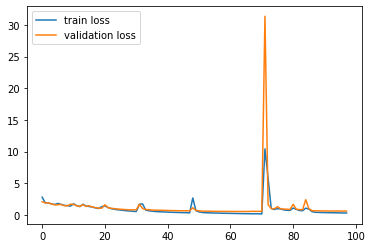

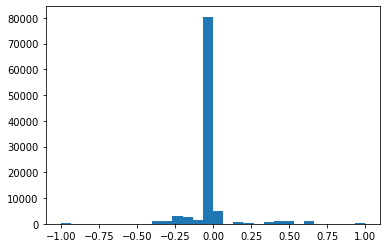



ANN Nº:  3 

313/313 [==============================] - 1s 2ms/step - loss: 1.1311 - accuracy: 0.5801


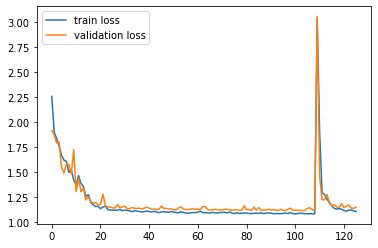

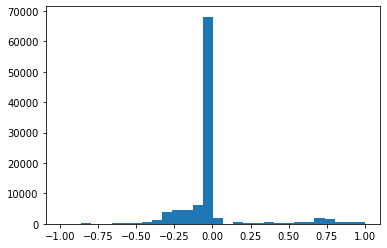



ANN Nº:  4 

313/313 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.9548


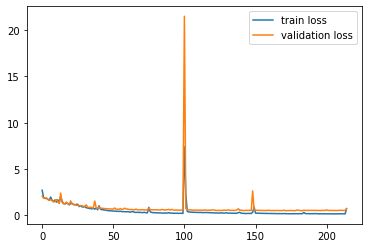

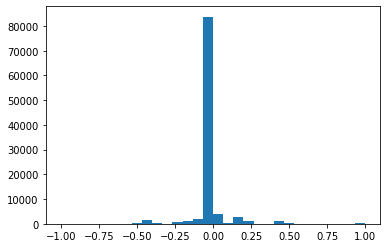



ANN Nº:  5 

313/313 [==============================] - 1s 1ms/step - loss: 1.0928 - accuracy: 0.6162


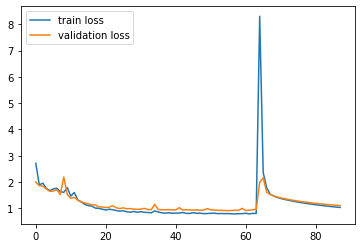

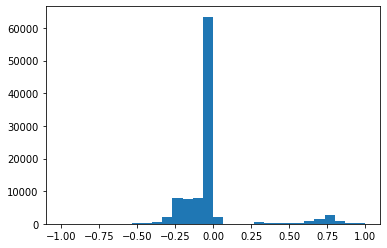



ANN Nº:  6 

313/313 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.9478


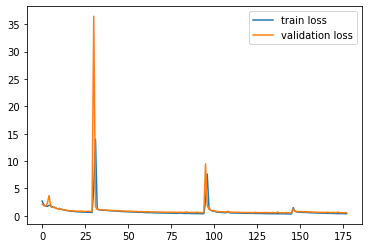

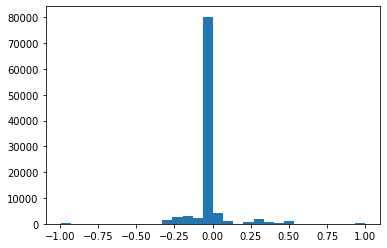



ANN Nº:  7 

313/313 [==============================] - 1s 1ms/step - loss: 0.5893 - accuracy: 0.8815


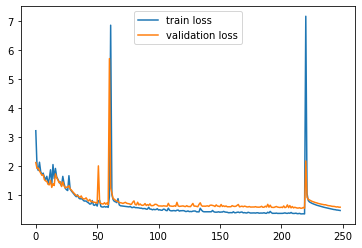

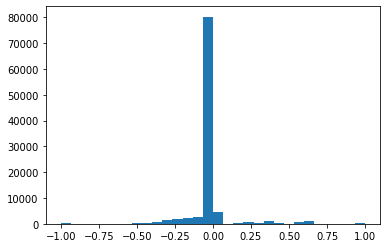



ANN Nº:  8 

313/313 [==============================] - 1s 1ms/step - loss: 0.8260 - accuracy: 0.7946


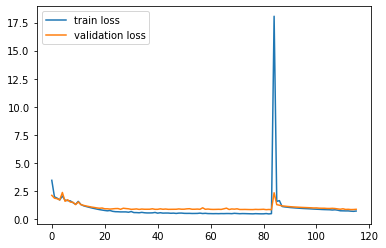

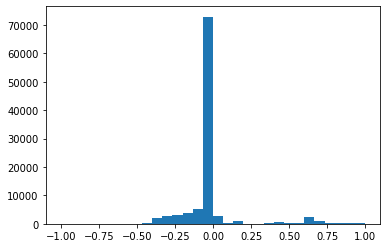



ANN Nº:  9 

313/313 [==============================] - 1s 2ms/step - loss: 0.8232 - accuracy: 0.8989


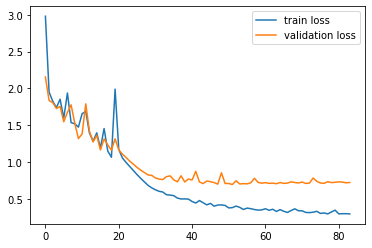

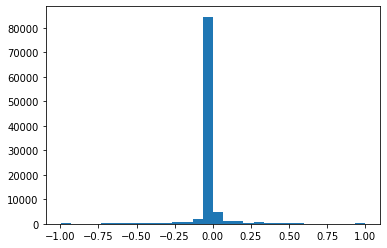

In [5]:
for i in range(10):
    print('ANN Nº: ', i, '\n')
    
    path = os.path.join('./variated_outputs', 'simple_ann_train_features_'+ str(i) +'.out')
    simple_ann_train_features = np.loadtxt(path, dtype='float32', delimiter=' ')
    
    path = os.path.join('./variated_outputs', 'simple_ann_test_features_'+ str(i) +'.out')
    simple_ann_test_features = np.loadtxt(path, dtype='float32', delimiter=' ')
    
    model = Sequential()

    model.add(Dense(512, input_shape=(512,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    earlyStopping = EarlyStopping(monitor='val_loss',
                                  patience=32)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])

    history = model.fit(simple_ann_train_features,
                        y_train,
                        epochs=250, 
                        batch_size=1000, 
                        verbose=0, 
                        validation_split=0.2, 
                        callbacks=[earlyStopping])
        
    test_results = model.evaluate(simple_ann_test_features, y_test, verbose=1)
    predictions = model.predict(simple_ann_test_features)
    
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()
    
    l = []
    for y, p in zip(y_test, predictions): 
        l.append(y - p)
    
    plt.hist(np.array(l).flatten(), bins=30)
    plt.show()
    
    print('\n')